In [2]:
#https://www.investopedia.com/terms/m/mfi.asp
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib notebook

C:\Users\s2007\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
start='2014-1-1'
end='2016-3-31'
period = 14 #default
df = data.DataReader('AAPL', 'yahoo', start, end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,80.182854,79.142860,79.167145,80.145714,55771100.0,71.756508
2014-01-02,79.575714,78.860001,79.382858,79.018570,58671200.0,70.747330
2014-01-03,79.099998,77.204285,78.980003,77.282860,98116900.0,69.193306
2014-01-06,78.114288,76.228569,76.778572,77.704285,103152700.0,69.570625
2014-01-07,77.994286,76.845711,77.760002,77.148575,79302300.0,69.073074
...,...,...,...,...,...,...
2016-03-24,106.250000,104.889999,105.470001,105.669998,26133000.0,98.779060
2016-03-28,106.190002,105.059998,106.000000,105.190002,19411400.0,98.330376
2016-03-29,107.790001,104.879997,104.889999,107.680000,31190100.0,100.657997


In [4]:
df['positive'] = np.nan
df['negative'] = np.nan
df['positive'].fillna(0, inplace=True)
df['negative'].fillna(0, inplace=True)

df['typical_p'] = (df['High'] + df['Low'] + df['Close']) / 3
df['rmf'] = df['typical_p'] * df['Volume']

for i in range(len(df)):
    for n in range(period):
        if df['typical_p'][i-n] > df['typical_p'][i-n-1]:
            df.loc[df.index[i], ['positive']] += df['typical_p'][i-n]
        elif df['typical_p'][i-n] < df['typical_p'][i-n-1]:
            df.loc[df.index[i], ['negative']] += df['typical_p'][i-n]

df['MFI'] = 100 - ( 100 / ( 1 + df['positive'] / df['negative'] ) )

<IPython.core.display.Javascript object>


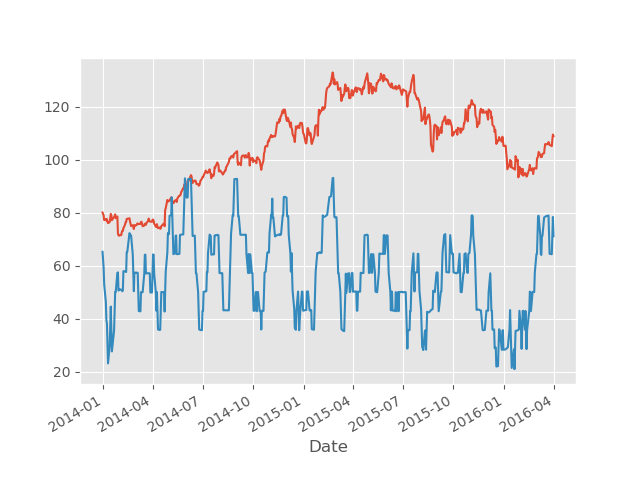

In [7]:
%matplotlib notebook
df['Close'].plot()
df['MFI'].plot()
plt.show()